<a href="https://colab.research.google.com/github/esmmif/RPAD_PCA_Kmeans_Wine_15.10/blob/main/RPAD_PCA_Kmeans_Wine_15_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1. Carregamento e visualização

In [2]:
wine = load_wine()
X = wine.data
y_true = wine.target # Rótulos verdadeiros

df = pd.DataFrame(X, columns=wine.feature_names)

df['classe'] = y_true

In [3]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,classe
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [8]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [9]:
# Tirando target para a padronização das features no próximo passo
X = df.drop('classe', axis=1)

#  2. Padronização dos dados

In [10]:
# Padronizando
X_scaled = StandardScaler().fit_transform(X)

In [11]:
pd.DataFrame(X_scaled, columns=wine.feature_names).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


# 3. Aplicação do PCA
- Aplicação do PCA para reduzir as 13 variáveis para 2 componentes principais

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Cria um DataFrame com os componentes principais
pca_df = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])

print(f"Formato original dos dados: {X.shape}")
print(f"Formato dos dados após o PCA: {X_pca.shape}")
print(f"\nVariância explicada pelos 2 componentes: {sum(pca.explained_variance_ratio_) * 100:.2f}%")

Formato original dos dados: (178, 13)
Formato dos dados após o PCA: (178, 2)

Variância explicada pelos 2 componentes: 55.41%


# 4. Clusterização com k-means


In [13]:
# O número de clusters (k) é 3, pois sabemos que existem 3 tipos de vinho.
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_pca)

# Adiciona os clusters encontrados ao nosso DataFrame do PCA
pca_df['Cluster_KMeans'] = y_kmeans

# 5. Visualização


Mapa de correção de rótulos (KMeans -> Real): {np.int32(0): 0, np.int32(2): 1, np.int32(1): 2}


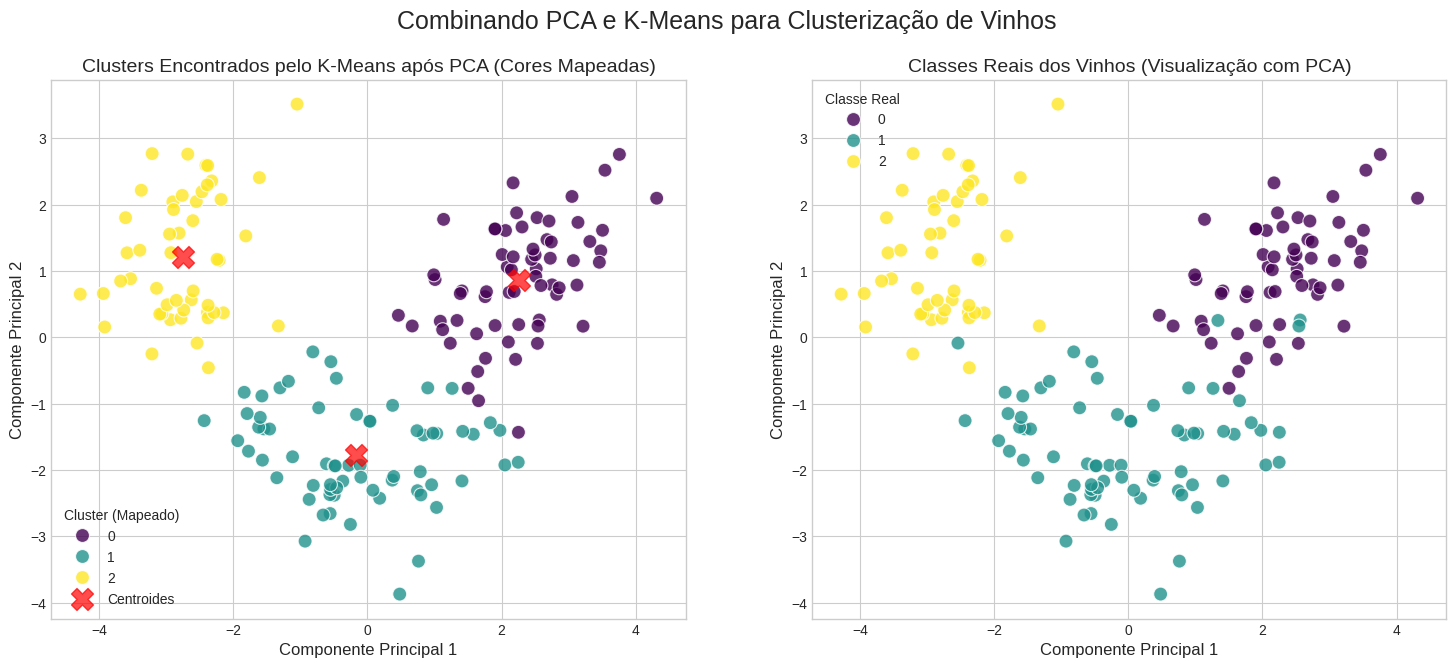

In [16]:
from scipy.stats import mode

# mapa para alinhar os rótulos do K-Means com os rótulos reais
map_labels = {}
for i in range(3):
    # Para cada classe real (0, 1, 2), encontre os rótulos que o K-Means atribuiu
    mask = (pca_df['Classe_Real'] == i)
    # A moda nos diz qual rótulo de cluster é o mais comum para aquela classe real
    mapped_label = mode(pca_df['Cluster_KMeans'][mask])[0]
    map_labels[i] = mapped_label

correction_map = {v: k for k, v in map_labels.items()}
print(f"Mapa de correção de rótulos (KMeans -> Real): {correction_map}")

pca_df['Cluster_Mapeado'] = pca_df['Cluster_KMeans'].map(correction_map)


# --- Visualização dos Resultados ---

plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7)) # Aumentei um pouco a largura

# --- Gráfico 1: Clusters encontrados pelo K-Means (com cores mapeadas) ---
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', hue='Cluster_Mapeado',
                data=pca_df, palette='viridis', s=100, alpha=0.8, ax=ax1, hue_order=[0, 1, 2])
ax1.set_title('Clusters Encontrados pelo K-Means após PCA (Cores Mapeadas)', fontsize=14)
ax1.set_xlabel('Componente Principal 1', fontsize=12)
ax1.set_ylabel('Componente Principal 2', fontsize=12)

# Centros dos clusters
centers = kmeans.cluster_centers_
ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=250, alpha=0.7, marker='X', label='Centroides')
ax1.legend(title='Cluster (Mapeado)')


# --- Gráfico 2: Rótulos Verdadeiros (para comparação) ---
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', hue='Classe_Real',
                data=pca_df, palette='viridis', s=100, alpha=0.8, ax=ax2, hue_order=[0, 1, 2])
ax2.set_title('Classes Reais dos Vinhos (Visualização com PCA)', fontsize=14)
ax2.set_xlabel('Componente Principal 1', fontsize=12)
ax2.set_ylabel('Componente Principal 2', fontsize=12)
ax2.legend(title='Classe Real')

plt.suptitle('Combinando PCA e K-Means para Clusterização de Vinhos', fontsize=18)
plt.show()